Let's review a basic lerp operations and their strengths within the context of interpolating polynomials. The aim of the notebook is to present simple tools for the constructions of space curves, describing some methods and algorithms.

In [26]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt

sp.init_printing(order='grevlex')

### Uniform

The unfiform lerp functions is defined as follows:

$$
    l(a,b) = (1 -t) * a + t * b
$$

In [27]:
# uniform lerp

def lerp_u(one, two, t):
    
    return (1 - t) * one + t * two

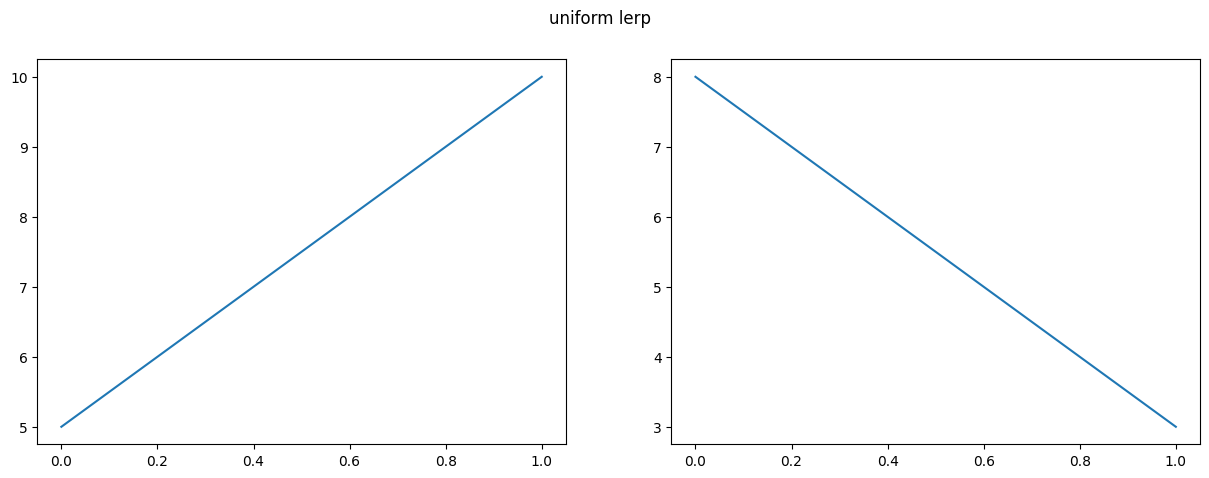

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('uniform lerp')

x = np.linspace(0, 1.0, num=100)

y1 = [lerp_u(5, 10, t) for t in x]
y2 = [lerp_u(8, 3, t) for t in x]

ax1.plot(x,y1)
ax2.plot(x,y2)

### Non-Uniform

Let's make it non uniform by using a different range, the following transformation re-scales the parameter range. Below we see the previously defined function with the new range. This concept is esential for the rest of the work in these notebooks.

$$
t \to \frac{t - t_i}{t_{i+1} - t_i}
$$

In [29]:
# non uniform lerp ( based on rescaling the prev lerp )

def lerp_nu(xs, ts, t):

    x_str, x_end = xs

    t_str, t_end = ts

    t_map = (t - t_str) / (t_end - t_str)

    return lerp_u (x_str, x_end, t_map)

For simplicity reasons we define the non-uniform lerp into a single function. Both functions are equivalent.

In [30]:
# non uniform lerp ( full implementation )

def lerp(xs, ts, t):

    x_str, x_end = xs

    t_str, t_end = ts

    t_map = (t - t_str) / (t_end - t_str)

    return (1 - t_map) * x_str + t_map * x_end

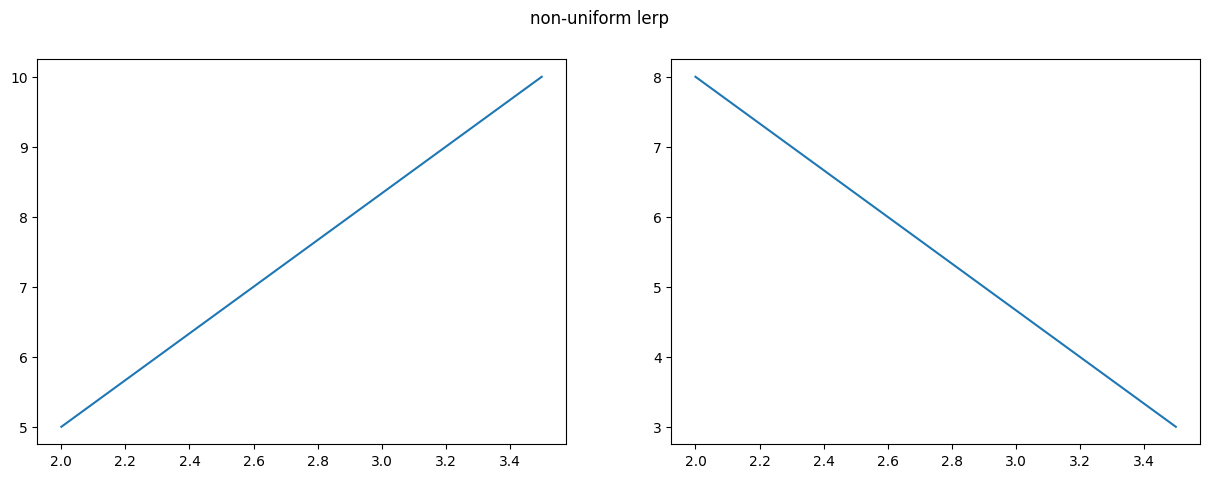

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('non-uniform lerp')

x = np.linspace(2, 3.5, num=100) # ok ahroa; 

y1 = [lerp([5, 10], [2, 3.5], t) for t in x]
y2 = [lerp([8, 3], [2, 3.5], t) for t in x]

ax1.plot(x,y1)
ax2.plot(x,y2)

### Interpolating Polynomials

Iterative use of the lerp function to create interpolating curves. Given n + 1 points, there is a unique polynomial of degree ≤ n which goes through the given points. There is a triangular scheme that we can use as the base for the implementation. In the quadratic case, it looks like this:

$$
\begin{equation*}
\def\negspace{\!\!\!\!\!\!}
\begin{array}{ccccccccccccc}
&&&& \boldsymbol{p}_{0,1,2} &&&&
\\
&&
& \negspace \frac{t_2 - t}{t_2 - t_0} \negspace && \negspace \frac{t - t_0}{t_2 - t_0} \negspace &
&&
\\
&& \boldsymbol{p}_{0,1} &&&& \boldsymbol{p}_{1,2} &&
\\
& \negspace \frac{t_1 - t}{t_1 - t_0} \negspace && \negspace \frac{t - t_0}{t_1 - t_0} \negspace &
& \negspace \frac{t_2 - t}{t_2 - t_1} \negspace && \negspace \frac{t - t_1}{t_2 - t_1} \negspace &
\\
\boldsymbol{x}_0 &&&& \boldsymbol{x}_1 &&&& \boldsymbol{x}_2
\end{array}
\end{equation*}
$$

In [32]:
def convex_hull_gen(cs, ts, t):

  if (len(cs) == 2):

    # need a non-uniform lerp at the base: 

    return lerp(cs, ts, t)

  else:

    tl = ts[-1]
    t0 = ts[0]

    # non uniform eval at each recursive step -> for each side: 

    eval_left = ( (tl-t)/(tl-t0) ) * convex_hull_gen(cs[:-1], ts[:-1], t)
    eval_rigth = ( (t-t0)/(tl-t0) ) * convex_hull_gen(cs[1:], ts[1:], t)

    return eval_left + eval_rigth

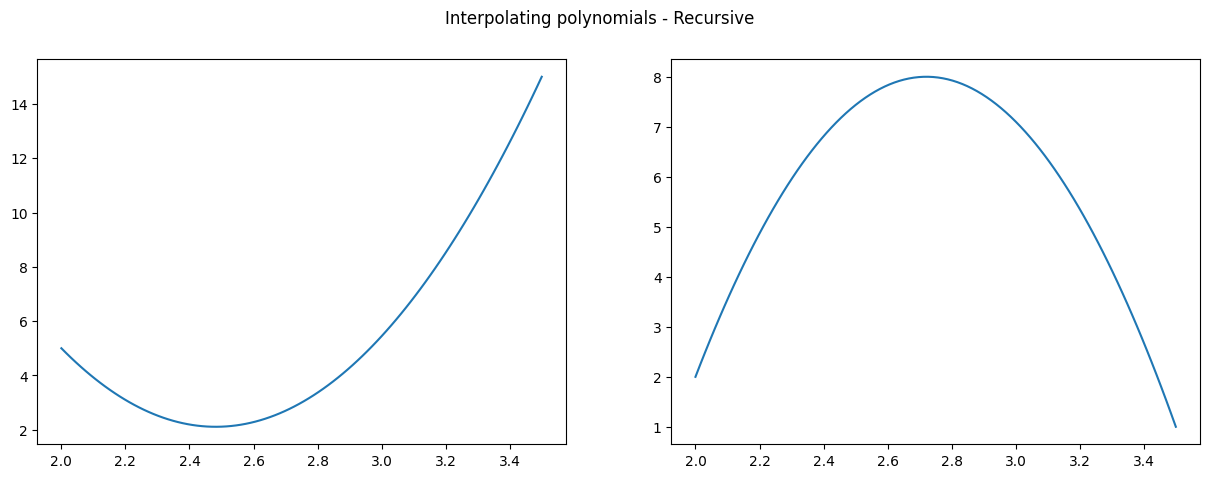

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Interpolating polynomials - Recursive')

a,b,c = 5, 3, 15
t0,t1,t2 = 0, 0.5, 1.0

tetha = np.linspace(0, 1, num=100)
y = [convex_hull_gen([a,b,c], [t0,t1,t2], x) for x in tetha]

ax1.plot(x,y)

a,b,c = 2, 8, 1
tetha = np.linspace(0, 1, num=100)
y = [convex_hull_gen([a,b,c], [t0,t1,t2], x) for x in tetha]

ax2.plot(x,y)

### 2D Representation

In [34]:
# generate n -dimensional control points:

import random

def r_n_dim_control(dim, elems):

    N, R = 5, 10

    return [random.sample(range((R + 1) * (R + 1)), dim) for _ in range(elems) ]

In [35]:
curves_control = [r_n_dim_control(2, 5) for _ in range(3)]

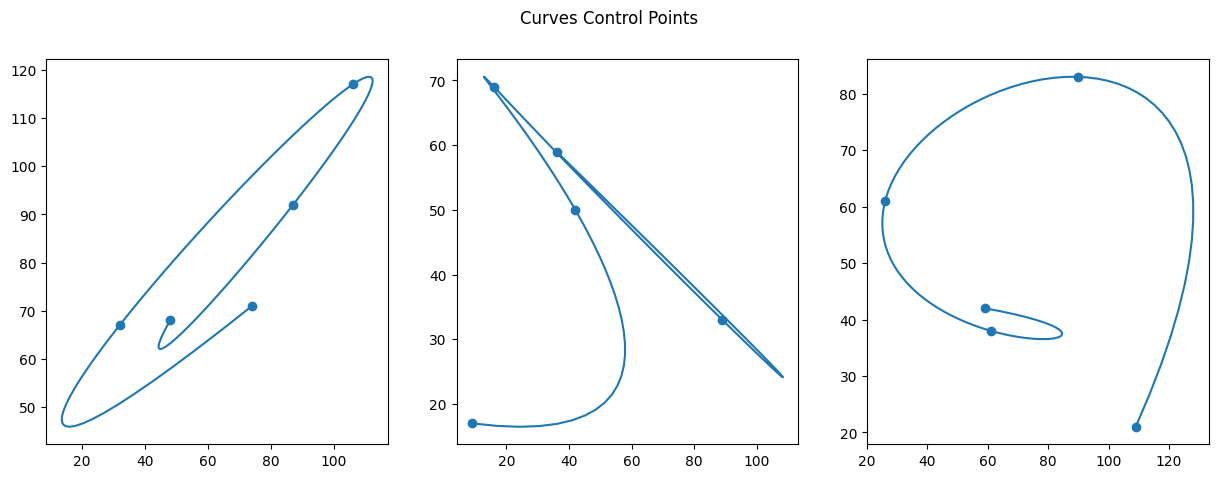

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('Curves Control Points')

for idx, control in enumerate(curves_control):

    a,b = zip(*control)

    ts = np.linspace(0, 1.0, len(control))
    tetha = np.linspace(0, 1.0, num=100)

    x = [convex_hull_gen(a, ts, x1) for x1 in tetha]
    y = [convex_hull_gen(b, ts, y1) for y1 in tetha]

    axs[idx].plot(x,y)
    axs[idx].scatter(a,b)


### Symbolic Computation

Both -recursive and -iterative methods should compute equivalent polynomials, the following evaluations presents both expressions and their matrix forms. 

In [37]:
curve_degree = 4

x_coll = sp.symbols(" ".join(f"x_{x}" for x in range(curve_degree)), real=True)

x_coll

In [38]:
t_coll = sp.symbols(" ".join(f"t_{x}" for x in range(curve_degree)), real=True)

t_coll

In [39]:
t = sp.symbols('t')

The result is the 

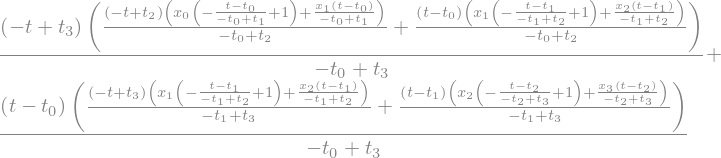

In [40]:
exp_1 = convex_hull_gen(x_coll, t_coll, t)

exp_1

In order to get a working matrix, we need a concrete evaluation of the expression (assing real values to t vector, linspace is used for uniform vector): 

In [41]:
t_coll = np.linspace(0, 1, curve_degree)

t_coll

array([0.        , 0.33333333, 0.66666667, 1.        ])

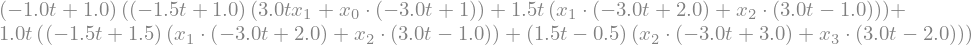

In [42]:
exp_1 = convex_hull_gen(x_coll, t_coll, t)

exp_1

In [43]:
b1 = [exp_1.expand().coeff(x).factor() for x in x_coll]

b1

Now we can calculate the appropiate matrices: 

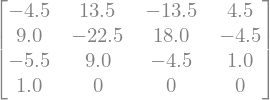

In [44]:
bmat_1 = sp.Matrix(
    [[c.coeff(x) for x in x_coll]
    for c in exp_1.as_poly(t).all_coeffs()])

bmat_1

### Polynomial Drawer

Small object-oriented approach by using the computed matrix for the curve. The method avoids the recursive process and uses the matrix like a look-up table.

In [45]:
import matplotlib.pyplot as plt

In [46]:
class PolynomialDrawer():

    # use prev computed matrix

    def __init__(self, mat, control_values):

        self.mat = sp.lambdify([], mat)()

        self.coeffs = control_values

    def eval(self, t):

        powers = [i for i in range(0,len(self.coeffs))][::-1]
        
        return t**powers @ self.mat @ self.coeffs


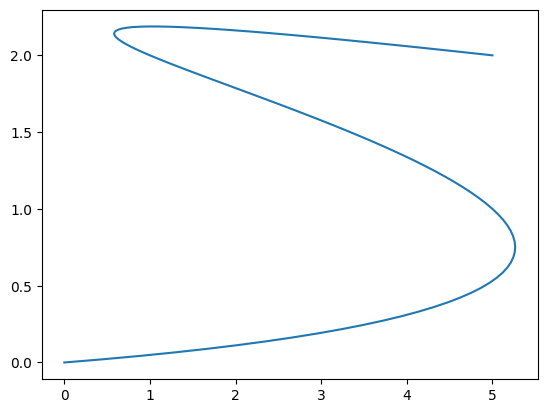

In [47]:
vertices = [0, 0], [5, 1], [1, 2], [5, 2]

s = PolynomialDrawer(bmat_1, [*vertices])

tetha = np.linspace(0,1, 100)

points = [s.eval(t) for t in tetha]

plt.plot(*zip(*points))

### Interpolating Polynomial

The entire process can be summarized into a small class, where the evaluating algorithm is called just once and the polynomial matrix is computed at object initialization.

In [48]:
class InterpolatingDrawer(PolynomialDrawer):

    # compute MH at the begining:

    def compute_matrix(self, deg):

        xsc = sp.symbols(" ".join(f"x_{x}" for x in range(deg)), real=True)

        tsc = np.linspace(0, 1, deg)

        exp = convex_hull_gen(xsc, tsc, t) 
        
        mat = sp.Matrix(

            [[c.coeff(x) for x in xsc]
             
            for c in exp.as_poly(t).all_coeffs()])

        return mat
    
    # init calling super

    def __init__(self, control_values):
        
        PolynomialDrawer.__init__(self, 
                                  self.compute_matrix(len(control_values)), 
                                  control_values)

In [49]:
# consider two plots; 

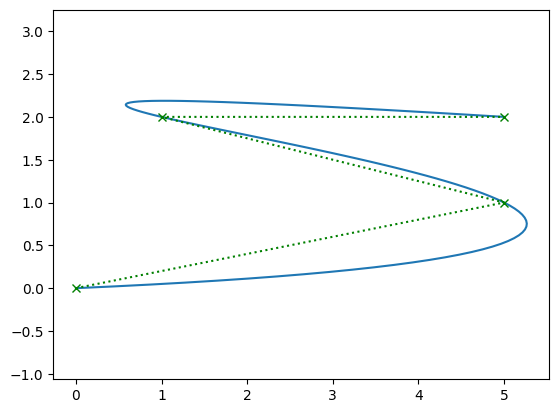

In [50]:
vertices    = np.array([[0, 0], [5, 1], [1, 2], [5, 2]])
polynomial  = InterpolatingDrawer([*vertices])
tetha       = np.linspace(0,1, 100)
points      = [polynomial.eval(t) for t in tetha]

plt.plot(*zip(*points))
plt.plot(*vertices.T, 'x:g')
plt.axis('equal');